In [38]:
include("../code/headers.jl")

# 1. Populations

In [23]:
Λ = OffsetVector([0,0,0.5,0.5], 0:3)
K = OffsetVector([0,0,0,1], 0:3)

mK = sum(k*K[k] for k=eachindex(K))
mΛ = sum(d*Λ[d] for d=eachindex(Λ))
α = mΛ/mK
@show R=1-α
J = 20
y = 0.5
popsize=10^6
popP = fill(1/(2J+1), -J:J, 1:popsize);
popQ = fill(1/(2J+1), -J:J, 1:popsize);

R = 1 - α = 0.16666666666666663


In [24]:
ProgressMeter.ijulia_behavior(:clear)
popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, popQ=popQ, popP=popP, y=y);

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/crotti/.julia/packages/ProgressMeter/poEzd/src/ProgressMeter.jl:463
Progress: 100%|█████████████████████████████████████████| Time: 0:02:56
  err:  0.0007192858222868637/5.0e-5


err = 0.0007192858222868637


In [25]:
avgPop = mean(popP, dims=2)
varPop = checkRS(popP)
avgPop, varPop

([0.37822557946943636; 0.0920612484367229; … ; 0.09238484302366781; 0.37767980300208415… ; ], 362.23933848639854)

# 2. Overlap

In [35]:
O,F = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)
Σ = -O - F
D=(1-O)/2
@show R D F Σ;

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/crotti/.julia/packages/ProgressMeter/poEzd/src/ProgressMeter.jl:463
Progress: 100%|█████████████████████████████████████████| Time: 0:00:32
  F:  -4.347296463149443
  O:  0.1800577990548997
  D:  0.40997110047255014


R = 0.16666666666666663
D = 0.40997110047255014
F = -4.347296463149443
Σ = 4.167238664094544


## Varying size

In [39]:
using Unzip
ProgressMeter.ijulia_behavior(:append)
y = 0.2
J = 30

rs = 0:0.1:1
Rs=fill(NaN, eachindex(rs))
Ds=fill(NaN, eachindex(rs))
Fs=fill(NaN, eachindex(rs))

for (i,r) in pairs(rs)
    Λ = [0,1-r,r]
    K = [0,0,1]
    mK = sum(k*K[k] for k=eachindex(K))
    mΛ = sum(d*Λ[d] for d=eachindex(Λ))
    α = mΛ/mK
    popsize=10^6
    popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, y=y)
    O,F = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)
    Σ = -O - F
    D=(1-O)/2
    R=1-α
    @show R D F
    Rs[i],Ds[i],Fs[i] = R, D, F
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:14
  F:  -10.199226061562765
  O:  0.1943321373339167
  D:  0.4028339313330417


R = 0.0
D = 0.4028339313330417
F = -10.199226061562765


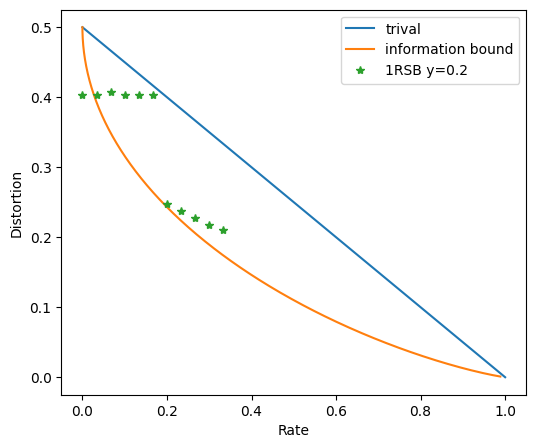

PyObject <matplotlib.legend.Legend object at 0x7f44f5f79c50>

In [46]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = PyPlot.subplots(figsize=(6,5))
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(H.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(Rs,Ds, "*", label="1RSB y=0.2")
legend()